In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import wrangle

In [2]:
df = wrangle.get_curriculum_data()
df = wrangle.prepare_datetime_col(df)

Returning saved csv files.


3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

# 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

### A : The students who were in the bottom 25% of total pings were all in full stack java cohorts between 2018-02 and 2019-10.  The difference between their last ping time and the end of the cohort indicates that about half of them may have left the program.

- There are in the following cohorts : Sequoia (21), Teddy (5), Ulysses (7), Voyageurs (6), Xanadu (2), Yosemite (7), Zion (2), Andromeda (4), Betelgeuse (11)
- These are all full stack java cohorts ending inbetween 2018-02 to 2019-10
- In looking at the difference between the students last ping and the end date for the cohort, just over half of these students made their last ping two weeks before the end of the cohort, indicating that they may have left.

first get a dataframe of only students and change the date cols to datetime objects

In [3]:
#get a dataframe of just students
def get_students_df(df):
    return df[~(df.name=='Staff')]

students_df = get_students_df(df)

In [4]:
students_df

,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_name,timestamp
0,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:55:03
1,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:02
2,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:05
3,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,full_stack_php,2018-01-26 09:56:06
4,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,full_stack_java,2018-01-26 09:56:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294515,jquery,407,32.0,97.105.19.58,32.0,Betelgeuse,#betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,NaN,full_stack_java,2019-07-09 08:50:22
294516,jquery/ajax,407,32.0,97.105.19.58,32.0,Betelgeuse,#betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,NaN,full_stack_java,2019-07-09 08:50:26
294518,jquery/ajax/requests-and-responses,407,32.0,97.105.19.58,32.0,Betelgeuse,#betelgeuse,2019-05-28,2019-10-08,2019-05-28 18:41:05,2019-05-28 18:41:05,NaN,full_stack_java,2019-07-09 08:51:57
294519,spring/fundamentals/views,384,31.0,97.105.19.58,31.0,Andromeda,#andromeda,2019-03-18,2019-07-30,2019-03-18 20:35:06,2019-03-18 20:35:06,NaN,full_stack_java,2019-07-09 08:52:08


In [5]:
def make_timedate_columns(df):
    """
    Make all the columns with dates into datetime columns
    """
    df['start_date'] = pd.to_datetime(df['start_date'])
    df['end_date'] = pd.to_datetime(df['end_date'])
    df['created_at'] = pd.to_datetime(df['created_at'])
    df['update_at'] = pd.to_datetime(df['updated_at'])
    return df

df = make_timedate_columns(df)
students_df = get_students_df(df)

Now filter out students that access the website when their cohort is active

In [6]:
active_students = students_df[(students_df.timestamp > students_df.start_date) & (students_df.timestamp < students_df.end_date)]

### How often does a typical student access the curriculum during their cohort time period?

average student accesses the curriculum about 828 times, and 75% of students access the curriculum at least 422 times.  these numbers have increased in recent cohorts.

In [7]:
active_students.user_id.value_counts().describe()

count     256.000000
mean      828.238281
std       581.148439
min         4.000000
25%       422.000000
50%       765.500000
75%      1139.250000
max      4763.000000
Name: user_id, dtype: float64

In [13]:
# these numbers increase slightly for recent cohorts
active_students[active_students.start_date.dt.year >= 2018].user_id.value_counts().describe()

count     235.000000
mean      892.982979
std       562.557393
min         4.000000
25%       521.500000
50%       824.000000
75%      1184.500000
max      4763.000000
Name: user_id, dtype: float64

<AxesSubplot:xlabel='timestamp', ylabel='Count'>

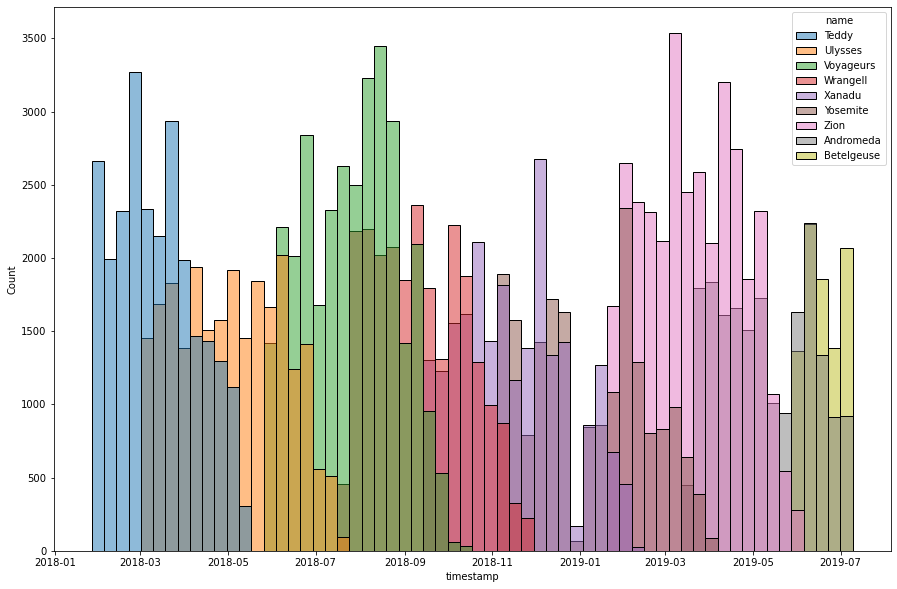

In [12]:
# what is the plot of access time for recent cohorts?
plt.figure(figsize=(15, 10))
sns.histplot(data = active_students[active_students.start_date.dt.year >= 2018], x= 'timestamp', hue='name')

### Get all students that are in the bottom 25% of total pings and look at their characteristics

- There are in the following cohorts : Sequoia (21), Teddy (5), Ulysses (7), Voyageurs (6), Xanadu (2), Yosemite (7), Zion (2), Andromeda (4), Betelgeuse (11)
- These are all full stack java cohorts ending inbetween 2018-02 to 2019-10
- In looking at the difference between the students last ping and the end date for the cohort, just over half of these students made their last ping two weeks before the end of the cohort, indicating that they may have left.

In [100]:
usercounts = pd.DataFrame(active_students[['user_id']].value_counts()).rename(columns={0:'count'})
low_ping_users = usercounts[usercounts['count'] <= active_students.user_id.value_counts().quantile(0.25)].reset_index()['user_id']

what cohorts are they in?

In [110]:
active_students[active_students.user_id.isin(low_ping_users)].name.unique()

array(['Sequoia', 'Teddy', 'Ulysses', 'Voyageurs', 'Xanadu', 'Yosemite',
       'Zion', 'Andromeda', 'Betelgeuse'], dtype=object)

what program?

In [112]:
active_students[active_students.user_id.isin(low_ping_users)].program_name.unique()

array(['full_stack_java'], dtype=object)

how many are there in each cohort?

In [151]:
active_students[active_students.user_id.isin(low_ping_users)].groupby('name').user_id.nunique()

name
Andromeda      4
Betelgeuse    11
Sequoia       21
Teddy          5
Ulysses        7
Voyageurs      6
Xanadu         2
Yosemite       7
Zion           2
Name: user_id, dtype: int64

When were these cohorts active?

In [152]:
active_students[active_students.user_id.isin(low_ping_users)].end_date.unique()

array(['2018-02-15T00:00:00.000000000', '2018-05-17T00:00:00.000000000',
       '2018-07-19T00:00:00.000000000', '2018-10-11T00:00:00.000000000',
       '2019-02-08T00:00:00.000000000', '2019-04-03T00:00:00.000000000',
       '2019-06-04T00:00:00.000000000', '2019-07-30T00:00:00.000000000',
       '2019-10-08T00:00:00.000000000'], dtype='datetime64[ns]')

When were the students accessing the curriculum?

Text(0.5, 1.0, 'Access times of low ping students')

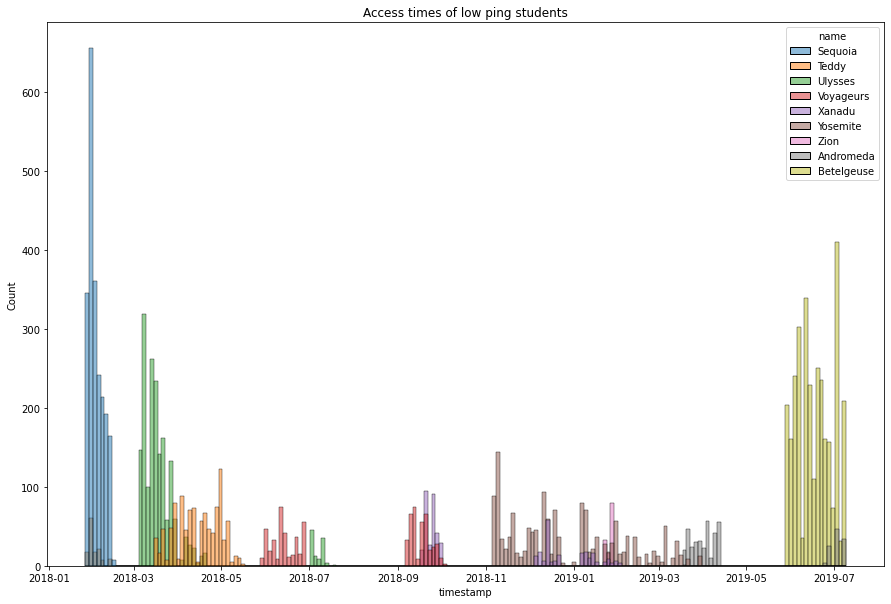

In [132]:
plt.figure(figsize=(15, 10))

sns.histplot(
    data=active_students[active_students.user_id.isin(low_ping_users)],
    x = 'timestamp',
    hue = 'name',
    bins = 200
)
plt.title('Access times of low ping students')

What were they accessing?

Most commonly accessing spring and html and javascript i

In [156]:
active_students[active_students.user_id.isin(low_ping_users)].path.value_counts().nlargest(50)

/                                                                            529
spring                                                                       352
html-css                                                                     302
html-css/elements                                                            263
html-css/css-ii/bootstrap-introduction                                       252
html-css/css-ii/bootstrap-grid-system                                        250
javascript-i                                                                 241
html-css/css-i/positioning                                                   228
html-css/forms                                                               226
html-css/css-ii/media-queries                                                221
toc                                                                          219
javascript-i/javascript-with-html                                            217
javascript-i/functions      

when were they active?

look at Betelgeuse in isolation for visualization

In [158]:
low_ping_hits = active_students[active_students.user_id.isin(low_ping_users)]

<AxesSubplot:xlabel='timestamp', ylabel='Count'>

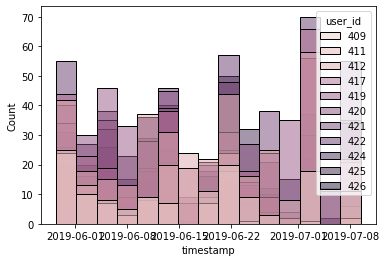

In [159]:
sns.histplot(data = low_ping_hits[low_ping_hits['name'] == 'Betelgeuse'], x='timestamp', hue='user_id')

In [162]:
low_ping_hits['diff_to_end'] = low_ping_hits['timestamp'] - low_ping_hits['end_date']

/var/folders/lw/_43z7rb5635_x1dwsyzrnc_m0000gn/T/ipykernel_76319/2696340186.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_ping_hits['diff_to_end'] = low_ping_hits['timestamp'] - low_ping_hits['end_date']


In [164]:
low_ping_hits['diff_to_end'].describe()

count                           11697
mean     -82 days +09:05:34.691031889
std        48 days 11:44:23.068316940
min               -149 days +14:03:58
25%               -124 days +09:45:25
50%               -105 days +10:07:11
75%                -23 days +11:18:45
max                 -1 days +14:24:10
Name: diff_to_end, dtype: object

It looks like some of these students might have quit before the end of the cohort.  Investigate this.

In [191]:
low_ping_hits.groupby('user_id')['diff_to_end'].describe().sort_values('max').head(35)

,count,mean,std,min,25%,50%,75%,max
user_id,,,,,,,,
388,8,-133 days +10:34:46.125000,0 days 00:54:29.405644434,-133 days +09:50:19,-133 days +09:50:26.750000,-133 days +10:11:51.500000,-133 days +11:11:53.750000,-133 days +12:19:23
340,18,-133 days +16:56:16.888888888,0 days 00:59:25.254283298,-133 days +15:23:15,-133 days +16:50:03,-133 days +16:51:25,-133 days +16:52:34.750000,-133 days +18:45:22
268,303,-138 days +22:55:53.996699670,3 days 23:25:03.377056097,-144 days +14:16:56,-141 days +10:36:27.500000,-137 days +09:58:37,-135 days +16:38:02,-129 days +09:20:23
342,110,-129 days +21:38:56.672727272,1 days 22:37:11.999822458,-133 days +15:24:28,-130 days +10:18:39,-128 days +18:05:19.500000,-127 days +06:44:40,-127 days +16:40:51
125,112,-132 days +19:11:55.901785714,2 days 22:21:44.522417738,-136 days +15:20:42,-134 days +12:13:37.500000,-132 days +07:51:06.500000,-129 days +10:50:30.500000,-126 days +13:57:57
132,157,-129 days +09:33:07.305732484,3 days 22:41:19.545924774,-136 days +15:30:10,-132 days +08:38:14,-129 days +16:22:48,-125 days +08:09:36,-122 days +08:15:29
133,405,-126 days +17:14:03.740740740,7 days 02:49:30.038071424,-136 days +15:30:30,-132 days +08:59:23,-125 days +08:52:01,-119 days +13:46:10,-113 days +10:28:39
129,199,-126 days +10:58:52.919597990,6 days 20:14:51.954331782,-136 days +15:28:28,-133 days +19:00:00,-126 days +07:42:29,-121 days +10:43:47,-113 days +10:34:52
126,231,-125 days +23:35:15.506493506,6 days 07:37:11.846538576,-136 days +15:20:56,-129 days +09:31:15,-125 days +13:58:50,-120 days +23:09:29,-113 days +13:32:53
